In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
root = 'PUMP-TcnED-dis.csv'
df = pd.read_csv(root, index_col=0)
df = df.rename(columns={'0': 'label'})

In [7]:
label = df['label'].values

In [8]:
def point_adjustment(y_true, y_score):
    score = y_score.copy()
    assert len(score) == len(y_true)
    splits = np.where(y_true[1:] != y_true[:-1])[0] + 1
    is_anomaly = y_true[0] == 1
    pos = 0
    for sp in splits:
        if is_anomaly:
            score[pos:sp] = np.max(score[pos:sp])
        is_anomaly = not is_anomaly
        pos = sp
    sp = len(y_true)
    if is_anomaly:
        score[pos:sp] = np.max(score[pos:sp])
    return score


In [9]:
average = np.sum(df.iloc[:, 1:], axis=0).values / len(df)
average

array([0.00867266, 0.0086707 , 0.00945432, ..., 0.00896055, 0.00904321,
       0.00913267])

In [10]:
dis = np.linalg.norm(average - df.iloc[:, 1:], axis=1, ord=np.Inf)
dis

array([0.06839687, 0.03992407, 0.05105365, ..., 0.23739507, 0.05588373,
       0.02753953])

In [11]:
adjdis = point_adjustment(label, dis)
adjdis

array([0.06839687, 0.03992407, 0.05105365, ..., 0.23739507, 0.05588373,
       0.02753953])

In [12]:
df3 = pd.DataFrame()
df3['label'] = label
df3['dis'] = dis
df3['adjdis'] = adjdis

In [13]:
true_d = df3[df3.label==0]
false_d = df3[df3.label==1]
len(true_d)

2665

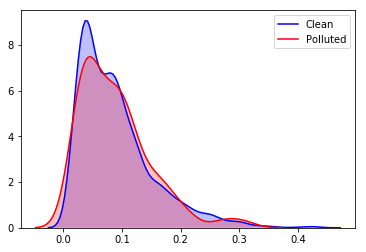

In [14]:
sns.kdeplot(true_d['dis'], shade=True, color="b", label='Clean')
sns.kdeplot(false_d['dis'], shade=True, color="r", label='Polluted')
plt.show()

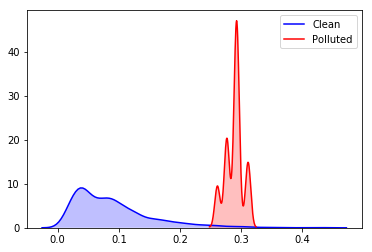

In [15]:
sns.kdeplot(true_d['adjdis'], shade=True, color="b", label='Clean')
sns.kdeplot(false_d['adjdis'], shade=True, color="r", label='Polluted')
plt.show()